In [2]:
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [4]:
df = pd.read_csv('LB_Forecast_Cash_1.csv')

In [5]:
df.head()

,Year,Week,ds,y,Recievables
0,2022,1,1/3/2022,1347046.53,216637.49
1,2022,2,1/10/2022,1348547.51,220001.93
2,2022,3,1/17/2022,1362682.96,186053.69
3,2022,4,1/24/2022,1297296.15,291930.41
4,2022,5,1/31/2022,1328902.74,298268.57


In [6]:
df.isnull().sum()

Year           0
Week           0
ds             0
y              0
Recievables    0
dtype: int64

<AxesSubplot:>

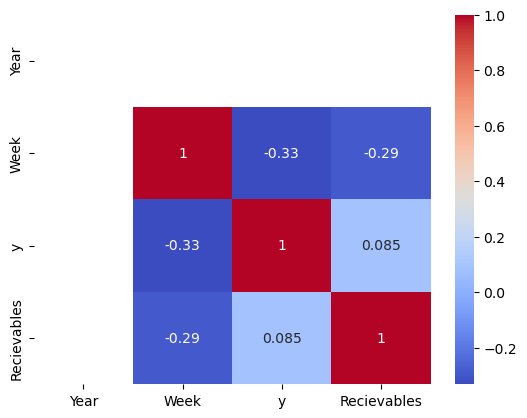

In [8]:
df_heat=df.corr()
sns.heatmap(df_heat,annot=True,cmap='coolwarm')

In [9]:
df.shape

(52, 5)

In [10]:
#Remove variables
del df['ds']

In [11]:
df.shape

(52, 4)

In [12]:
X=df[['Recievables', 'Week']]
y=df['y']

In [13]:
X_train,X_test,y_train,ytest = train_test_split(X,y,test_size=0.3, random_state=10,shuffle=True)

In [14]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [15]:
#find y-intercept
model.intercept_

1372643.6892810613

In [16]:
#Find x coefficients
model.coef_

array([ 4.47995014e-02, -2.66802011e+03])

In [17]:
model_results=pd.DataFrame(model.coef_,X.columns,columns=['Coefficients'])
model_results

,Coefficients
Recievables,0.044800
Week,-2668.020112


In [34]:
#Predict
Next_week=[545430,#Recievables 
           53]

Next_week_predict = model.predict([Next_week])
Next_week_predict

C:\Users\User\anaconda3\envs\PythonData\envs\mlenv\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([1255673.615381])

In [36]:
prediction=model.predict(X_test)
metrics.mean_absolute_error(ytest,prediction)

95863.26284925138